In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as npt
import pandas as pd
import pymde

from layout_gnn.dataset.dataset import DATA_PATH, ENRICOSemanticAnnotationsDataset
from layout_gnn.pairwise_metrics.core import PairwiseMetricLoader
from layout_gnn.utils import plot_embeddings

/home/drz/Layout-GNN/.venv/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /home/drz/Layout-GNN/.venv/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZNK3c1010TensorImpl36is_contiguous_nondefault_policy_implENS_12MemoryFormatE
  warn(f"Failed to load image Python extension: {e}")


In [2]:
loader = PairwiseMetricLoader(dataset=ENRICOSemanticAnnotationsDataset())
labels = [loader.dataset.labels[file.stem] for file in loader.dataset.files]

edges, histd_values = loader.get_edges_from_csv(
    filepath=DATA_PATH / f"{ENRICOSemanticAnnotationsDataset.__name__}_histd.csv",
)
histd_embeddings = pymde.preserve_neighbors(data=pymde.Graph.from_edges(edges, histd_values), verbose=True,).embed()

edges, ted_values = loader.get_edges_from_csv(
    filepath=DATA_PATH / f"{ENRICOSemanticAnnotationsDataset.__name__}_ted.csv"
)
ted_embeddings = pymde.preserve_neighbors(data=pymde.Graph.from_edges(edges, ted_values), verbose=True).embed()

edges, iou_values = loader.get_edges_from_csv(
    filepath=DATA_PATH / f"{ENRICOSemanticAnnotationsDataset.__name__}_iou.csv",
)
# We define the intesection over union distance as 1 - IOU
ioud_embeddings = pymde.preserve_neighbors(data=pymde.Graph.from_edges(edges, 1-iou_values), verbose=True,).embed()

Oct 06 05:57:16 PM: Computing 6-nearest neighbors, with max_distance=1.9090908765792847
Oct 06 05:57:16 PM: Computing shortest path distances (retaining 100.00 percent with max_distance=1.9090908765792847) ...
Oct 06 05:57:16 PM: Graph is weighted ... using slow path.
Oct 06 05:57:17 PM: processed node 1/1389
Oct 06 05:57:18 PM: processed node 139/1389
Oct 06 05:57:18 PM: processed node 277/1389
Oct 06 05:57:19 PM: processed node 415/1389
Oct 06 05:57:19 PM: processed node 553/1389
Oct 06 05:57:20 PM: processed node 691/1389
Oct 06 05:57:20 PM: processed node 829/1389
Oct 06 05:57:21 PM: processed node 967/1389
Oct 06 05:57:21 PM: processed node 1105/1389
Oct 06 05:57:21 PM: processed node 1243/1389
Oct 06 05:57:22 PM: processed node 1381/1389
Oct 06 05:57:22 PM: Computing quadratic initialization.
Oct 06 05:57:25 PM: Computing 6-nearest neighbors, with max_distance=2.957399606704712
Oct 06 05:57:25 PM: Computing shortest path distances (retaining 100.00 percent with max_distance=2.957

In [ ]:
ax = plot_embeddings(histd_embeddings, labels, s=5, figsize=(9, 6))

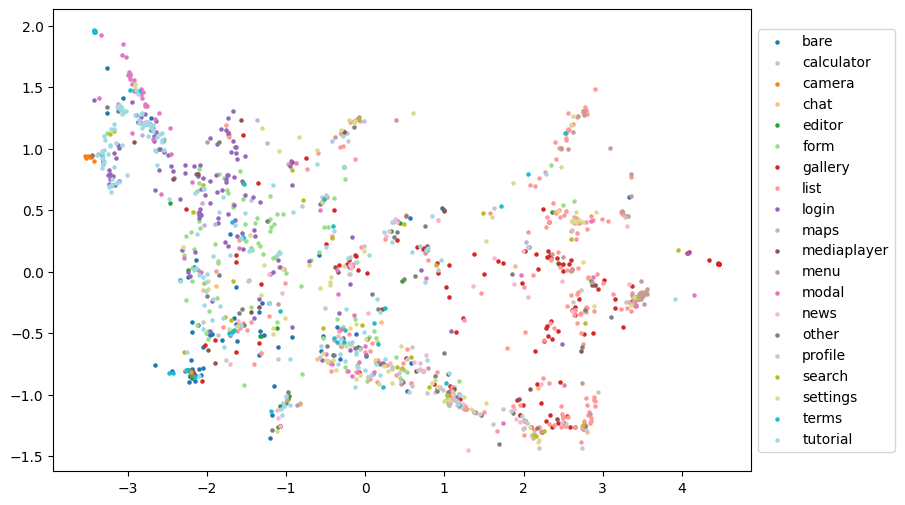

In [3]:
ax = plot_embeddings(ted_embeddings, labels, s=5, figsize=(9, 6))

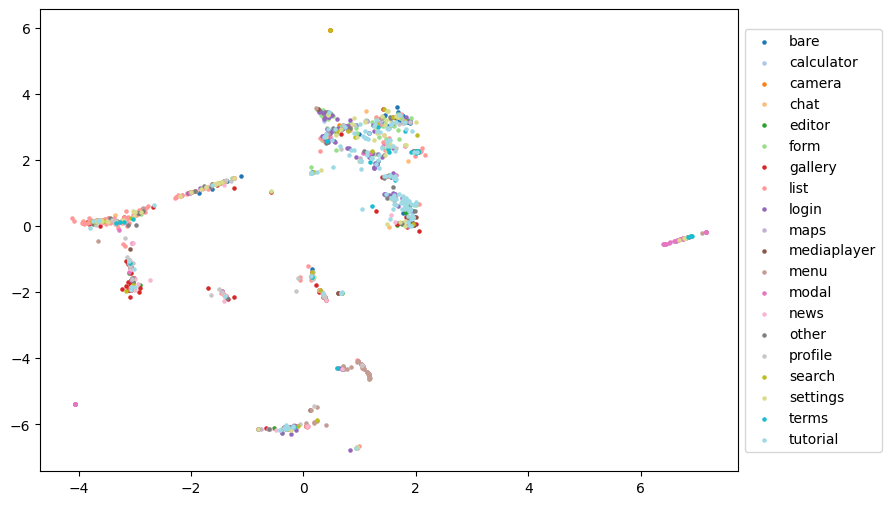

In [4]:
ax = plot_embeddings(ioud_embeddings, labels, s=5, figsize=(9, 6))

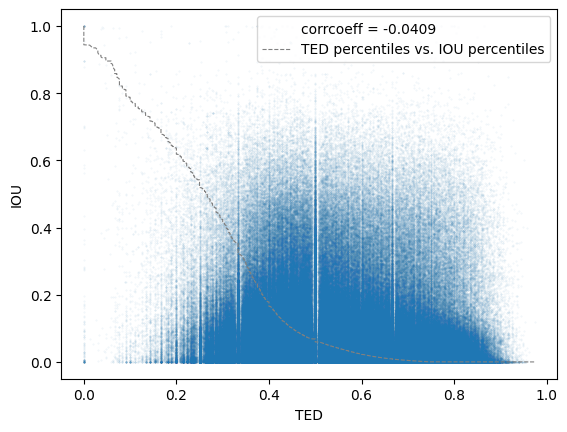

In [5]:
plt.scatter(ted_values, iou_values, s=0.1, alpha=0.1, label=f"corrcoeff = {np.corrcoef(ted_values, iou_values)[0, 1]:.3}")
plt.plot(np.sort(ted_values), np.sort(iou_values)[::-1], "--", c="grey", linewidth=0.8, label="TED percentiles vs. IOU percentiles")
plt.xlabel("TED")
plt.ylabel("IOU")
plt.legend(loc="upper right")
plt.show()